In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from dotmap import DotMap
import numpy as np
import seaborn as sns

In [2]:
limma = DotMap({
    'pv1': pd.read_csv(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\01-BasicStats\PESA\qLimma.tsv", sep='\t'),
    'pv2': pd.read_csv(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\01-BasicStats\PESA_V2\qLimma.tsv", sep='\t'),
    'awh': pd.read_csv(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\01-BasicStats\AWHS\qLimma.tsv", sep='\t')
})

In [3]:
xq = DotMap({
    'pv1': pd.read_csv(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Proteomics\PESA\WorkingFiles\Xq_minus_X_norm.tsv", sep='\t', index_col='Seqn'),
    'pv2': pd.read_csv(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Proteomics\PESA_V2\WorkingFiles\Xq_minus_X_norm.tsv", sep='\t', index_col='seqn'),
    'awh': pd.read_csv(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Proteomics\AWHS\WorkingFiles\Xq_minus_X_norm.tsv", sep='\t', index_col='Seqn')
})

In [15]:
mdata = DotMap({
    'pv1': pd.read_csv(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metadata\PESA\WorkingFiles\main_metadata.tsv", sep='\t', index_col='Seqn'),
    'pv2': pd.read_csv(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metadata\PESA_V2\WorkingFiles\main_metadata.tsv", sep='\t', index_col='Seqn'),
    'awh': pd.read_csv(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metadata\AWHS\WorkingFiles\main_metadata.tsv", sep='\t', index_col='Seqn')
})

mdata.pv1 = mdata.pv1.loc[xq.pv1.index]
mdata.pv2 = mdata.pv2.loc[xq.pv2.index]
mdata.awh = mdata.awh.loc[xq.awh.index]

In [49]:
f = open('DirectCorr_qq2_PESAV1_complement.txt')
q = f.readlines()
f.close()

In [50]:
q = [i.strip() for i in q]

In [51]:
q = np.array(q)[
    np.logical_and.reduce([
        np.isin(q, limma.pv1.index),
        np.isin(q, limma.pv2.index),
        np.isin(q, limma.awh.index)
    ])
].tolist()

In [52]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=q,
    y=limma.pv1.logFC[q],
    name='PESA-V1'
))

fig.add_trace(go.Bar(
    x=q,
    y=limma.pv2.logFC[q],
    name='PESA-V2'
))

fig.add_trace(go.Bar(
    x=q,
    y=limma.awh.logFC[q],
    name='AWHS'
))

fig.update_layout(width=1000, title='LogFC Disease / Control')
fig.show()

In [53]:


fig = go.Figure()

fig.add_trace(go.Bar(
    x=q,
    y=-np.log10(limma.pv1.loc[q, 'adj.P.Val'],),
    name='PESA-V1'
))

fig.add_trace(go.Bar(
    x=q,
    y=-np.log10(limma.pv2.loc[q, 'adj.P.Val']),
    name='PESA-V2'
))

fig.add_trace(go.Bar(
    x=q,
    y=-np.log10(limma.awh.loc[q, 'adj.P.Val']),
    name='AWHS'
))

fig.add_hline(-np.log10(0.05))

fig.update_layout(width=1000, title='-Log10(Adj.Pvalue) | Horizontal threshold at Adj.Pvalue = 0.05')
fig.show()

In [54]:
xq.awh[q]

,P01857,P01861,P01876,P01877,P04434,P23083,P80748
Seqn,,,,,,,
2515,-2.176631,-1.204244,-1.963304,-1.096365,-0.167386,0.810410,-1.032940
2816,0.203438,-0.454581,1.875549,1.040152,-0.329883,0.106301,0.354394
6646,-0.113631,0.900526,-0.876794,-1.514959,-0.071000,0.120023,-0.255939
10845,0.983062,-0.281090,-1.820919,-1.222438,-3.030837,0.508838,1.350055
11009,1.239294,0.663117,-0.436730,0.356919,0.179006,-0.012847,0.973445
...,...,...,...,...,...,...,...
991682,0.901370,0.450172,-0.442563,-0.047653,0.796414,-0.117387,-0.113687
996018,1.210755,-0.562707,-0.248368,0.265330,0.457340,1.689831,-0.451854
998152,-2.430216,0.031449,-0.820892,-1.444240,-1.707365,1.868529,1.083958


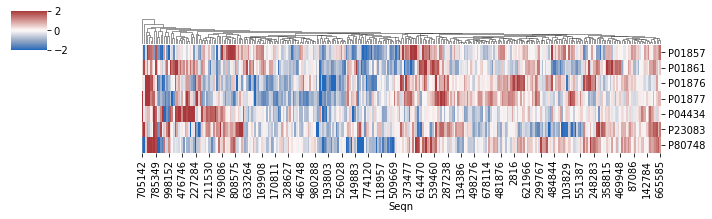

In [55]:
hmap = sns.clustermap(
    xq.awh[q].T,
    cmap='vlag', figsize=(10,3), center=0, row_cluster=False, col_cluster=True, vmin=-2, vmax=2)